In [13]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.linear_model import ElasticNet

<h1>Load Data</h1>

In [4]:
from sklearn.datasets import load_boston

In [9]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['Price'] = boston.target
boston_df.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
283,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
346,0.06162,0.0,4.39,0.0,0.442,5.898,52.3,8.0136,3.0,352.0,18.8,364.61,12.67,17.2
67,0.05789,12.5,6.07,0.0,0.409,5.878,21.4,6.4980,4.0,345.0,18.9,396.21,8.10,22.0
142,3.32105,0.0,19.58,1.0,0.871,5.403,100.0,1.3216,5.0,403.0,14.7,396.90,26.82,13.4
167,1.80028,0.0,19.58,0.0,0.605,5.877,79.2,2.4259,5.0,403.0,14.7,227.61,12.14,23.8
445,10.67180,0.0,18.10,0.0,0.740,6.459,94.8,1.9879,24.0,666.0,20.2,43.06,23.98,11.8
379,17.86670,0.0,18.10,0.0,0.671,6.223,100.0,1.3861,24.0,666.0,20.2,393.74,21.78,10.2
381,15.87440,0.0,18.10,0.0,0.671,6.545,99.1,1.5192,24.0,666.0,20.2,396.90,21.08,10.9
216,0.04560,0.0,13.89,1.0,0.550,5.888,56.0,3.1121,5.0,276.0,16.4,392.80,13.51,23.3
307,0.04932,33.0,2.18,0.0,0.472,6.849,70.3,3.1827,7.0,222.0,18.4,396.90,7.53,28.2


In [12]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
#Check null values

boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

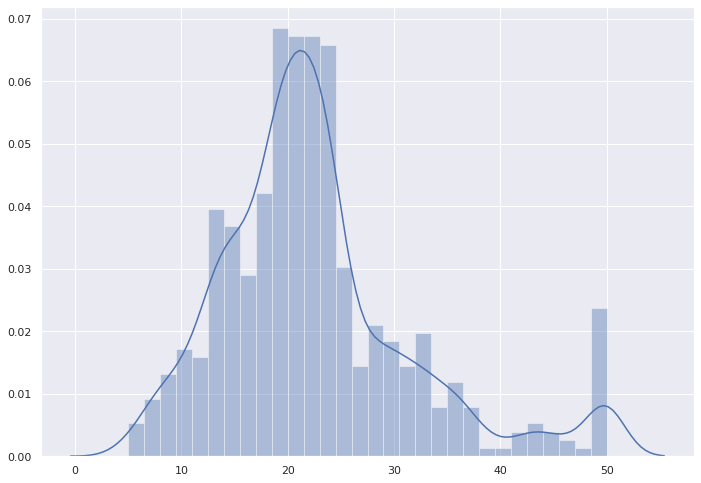

In [16]:
#Distribution of target variable
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston.target, bins=30)
plt.show()

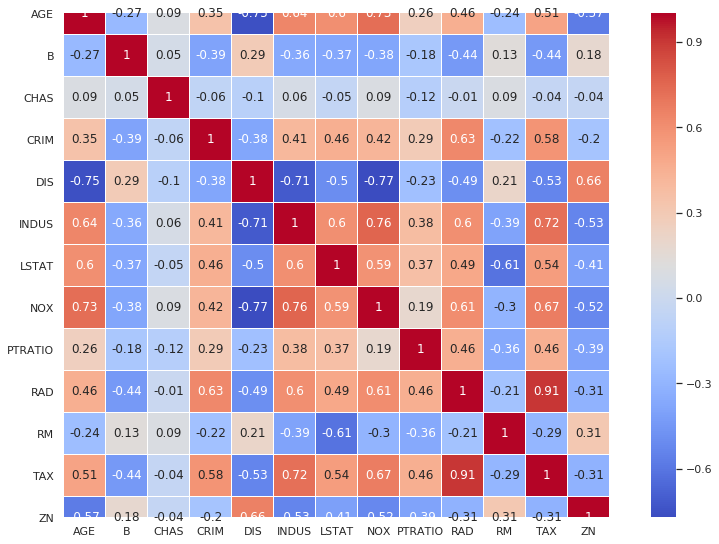

In [30]:
#Correlation matrix
df2 = boston_df[boston_df.columns.difference(['Price'])]
correlation_matrix = df2.corr().round(2)
sns.set(rc={'figure.figsize':(14.7,9.27)})
sns.heatmap(data=correlation_matrix, cmap='coolwarm', annot=True, linewidths=.2)